In [34]:
import numpy as np
import  matplotlib.pylab as plt

from scipy.ndimage.filters import convolve
from skimage import io, color, img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import view_as_windows, view_as_blocks

%matplotlib inline

In [26]:
image = img_as_ubyte(io.imread('03538.png'))
small = img_as_ubyte(io.imread('00000.png'))
image_cor = adjust_gamma(image, gamma=0.5)

In [7]:
x = np.array([[1, 2 ,3], [4, 5, 6], [7, 8, 9]])

In [11]:
y = view_as_blocks(x, (1, 1))

In [35]:
from skimage.transform import resize

(30, 29, 3)

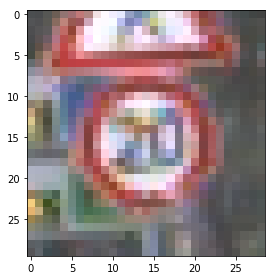

In [28]:
io.imshow(small)
small.shape

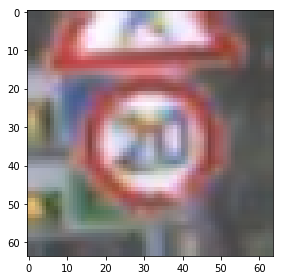

In [37]:
io.imshow(resize(small, (64, 64), mode='reflect'))

In [72]:
for cell in view_as_blocks(x, (1, 1)).reshape((9, 1, 1)):
    cell[0, 0] += 1

In [86]:
for e in x.reshape(9):
    e -= 1

In [179]:
def hist_by_cell(grad_cell, dir_cell, hist, index):
    for g, d in zip(grad_cell, dir_cell):
        hist_idx = int(min(np.floor(d / 20), 8))
        bin_center = hist_idx * 20 + 10
        if d - bin_center < 0:
            next_idx = (hist_idx - 1) % 9
            alpha = 1.0 - (bin_center - d) / 20
        else:
            next_idx = (hist_idx + 1) % 9
            alpha = 1.0 - (d - bin_center) / 20
        hist[index + hist_idx] += (1.0 - alpha) * g
        hist[index + next_idx] += alpha * g

adjusted = img_as_ubyte(adjust_gamma(image, gamma=0.5))
small = resize(adjusted, (64, 64), mode='reflect')
grad, dirs = get_derivative(get_intensity(small))

HIST_SIZE = 9 * grad.size // (8 * 8)
hist = np.zeros(HIST_SIZE)
grad_cells = view_as_blocks(grad, (8, 8)).reshape((64, 8, 8))
dir_cells = view_as_blocks(dirs, (8, 8)).reshape((64, 8, 8))
i = 0
for grad_cell, dir_cell in zip(grad_cells, dir_cells):
        g = grad_cell.reshape(64)
        d = dir_cell.reshape(64)
        hist_by_cell(g, d, hist, i)
        i += 9
hist = hist.reshape((8, -1))
hog = np.ndarray(7 * 7 * 4 * 9)
i = 0
for block in view_as_windows(hist, (2, 2 * 9), (1, 9)):
    vec = block.reshape(-1)
    size = vec.size
    hog[i:i + size] = vec / norm(vec, ord=2)
    i += size

In [180]:
hog.size

1764

In [183]:
t = [np.array([1, 2, 3]), np.array([4, 5, 6])]
import pandas as pd

df = pd.DataFrame(t)

In [172]:
norm(np.arange(4), ord=2)

3.7416573867739413

In [189]:
pd.DataFrame(df[1])

1
0  2
1  5

In [159]:
from numpy.linalg import norm

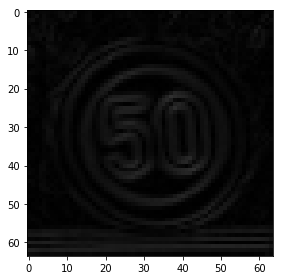

In [39]:
io.imshow(grad)

In [178]:
def get_intensity(image):
    return color.rgb2ycbcr(image)[:, :, 0]
    

def get_derivative(image):
    x_diff = np.array([[-1, 0, 1]])
    y_diff = x_diff.T
    dx = convolve(image, x_diff)
    dy = convolve(image, y_diff)
    directions = np.arctan2(dy, dx)
    directions[directions < 0] += np.pi
    return np.sqrt(dx**2 + dy**2), np.degrees(directions)


def make_hog_features(image):
    grad, dirs = get_derivative(get_intensity(adjust_gamma(image)))
    
    
"""def cut_by_cells(array, cells_x_count, cells_y_count):
    flatten = []
    unflatten = [np.array_split(z, cells_x_count, axis=1) for z in np.array_split(array, cells_y_count)]
    for cell in unflatten:
        flatten += cell
    return flatten


def make_hog_features(grad_cells, directions_cells):
    features = np.ndarray(len(grad_cells))
    f = 0
    for g, d in zip(grad_cells, directions_cells):
        hist = np.zeros(9)
        for i, val in np.ndenumerate(g):
            hist_idx = int(min(np.floor(d[i] / 20), 8))
            next_idx = (hist_idx + 1) % 9
            alpha = (d[i] - 20.0 * hist_idx) / 20
            hist[hist_idx] += (1.0 - alpha) * val
            hist[next_idx] += alpha * val
        max_idx = np.argmax(hist)
        features[f] = 20 * max_idx
        f += 1
    return features""";

In [201]:
grad, directions = get_derivative(get_intensity(image))
grad_cor, directions_cor = get_derivative(get_intensity(image_cor))
grad_cells = cut_by_cells(grad_cor, 16, 16)
directions_cells = cut_by_cells(grad_cor, 16, 16)

In [219]:
f = make_hog_features(grad_cells, directions_cells)

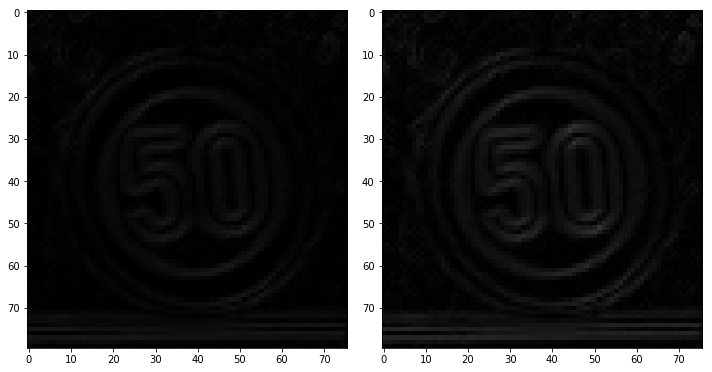

In [151]:
fig = plt.figure(figsize=(10, 10))

plt.subplot(121)
io.imshow(grad);
plt.subplot(122)
io.imshow(grad_cor)